GS - Visão Computacional

2TIAF

Luiza Gomes-> RM:97797


Lucas Mathues->RM:550466


Raphael Rodrigues->RM:552432

In [ ]:
!pip install tensorflow matplotlib

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


parent_dir = '../CORAIS'

img_width, img_height = 128, 128
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 25

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    parent_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)


validation_generator = train_datagen.flow_from_directory(
    parent_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


validation_loss, validation_accuracy = model.evaluate(validation_generator)
print("Validation Accuracy:", validation_accuracy)


y_pred = model.predict(validation_generator)


Found 596 images belonging to 2 classes.
Found 149 images belonging to 2 classes.
Epoch 1/25
19/19 [==============================] - 93s 5s/step - loss: 0.6417 - accuracy: 0.6292 - val_loss: 0.6725 - val_accuracy: 0.4765
Epoch 2/25
19/19 [==============================] - 8s 450ms/step - loss: 0.6047 - accuracy: 0.6812 - val_loss: 0.7641 - val_accuracy: 0.4765
Epoch 3/25
19/19 [==============================] - 5s 286ms/step - loss: 0.6012 - accuracy: 0.6862 - val_loss: 0.7113 - val_accuracy: 0.5235
Epoch 4/25
19/19 [==============================] - 6s 330ms/step - loss: 0.5642 - accuracy: 0.7081 - val_loss: 0.6289 - val_accuracy: 0.5302
Epoch 5/25
19/19 [==============================] - 6s 311ms/step - loss: 0.5442 - accuracy: 0.7114 - val_loss: 0.6984 - val_accuracy: 0.5436
Epoch 6/25
19/19 [==============================] - 6s 298ms/step - loss: 0.5333 - accuracy: 0.7148 - val_loss: 0.6996 - val_accuracy: 0.5302
Epoch 7/25
19/19 [==============================] - 8s 431ms/step - 

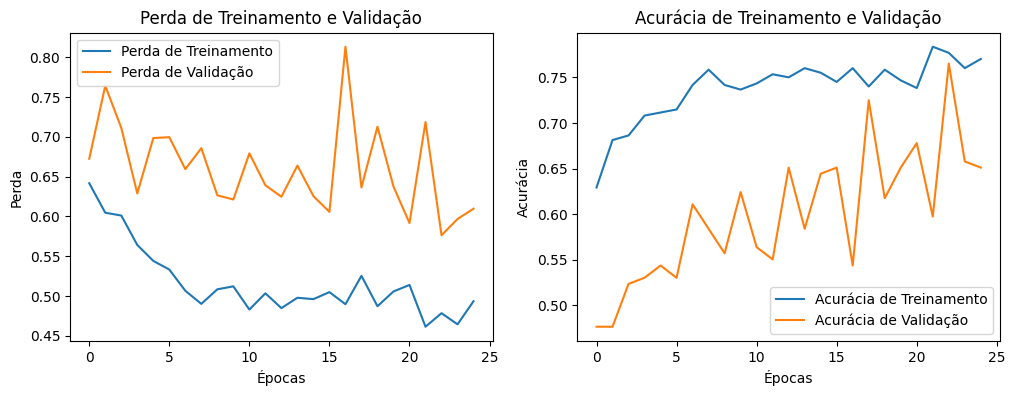

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Perda de Treinamento')
    plt.plot(history.history['val_loss'], label='Perda de Validação')
    plt.title('Perda de Treinamento e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
    plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
    plt.title('Acurácia de Treinamento e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    plt.show()

plot_history(history)


Found 596 images belonging to 2 classes.
Found 149 images belonging to 2 classes.
Epoch 1/25
19/19 [==============================] - 11s 421ms/step - loss: 0.6508 - accuracy: 0.6342 - val_loss: 0.7040 - val_accuracy: 0.6107
Epoch 2/25
19/19 [==============================] - 6s 301ms/step - loss: 0.5855 - accuracy: 0.6728 - val_loss: 0.6710 - val_accuracy: 0.4832
Epoch 3/25
19/19 [==============================] - 7s 364ms/step - loss: 0.5479 - accuracy: 0.7148 - val_loss: 0.6799 - val_accuracy: 0.4899
Epoch 4/25
19/19 [==============================] - 6s 333ms/step - loss: 0.5152 - accuracy: 0.7265 - val_loss: 0.6772 - val_accuracy: 0.5235
Epoch 5/25
19/19 [==============================] - 7s 384ms/step - loss: 0.5693 - accuracy: 0.6997 - val_loss: 0.7291 - val_accuracy: 0.5302
Epoch 6/25
19/19 [==============================] - 6s 296ms/step - loss: 0.5182 - accuracy: 0.7282 - val_loss: 0.5982 - val_accuracy: 0.6913
Epoch 7/25
19/19 [==============================] - 7s 396ms/step

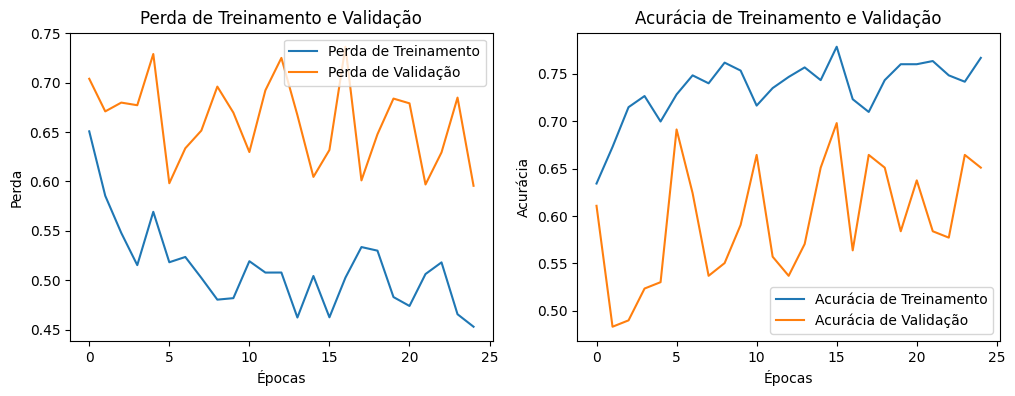

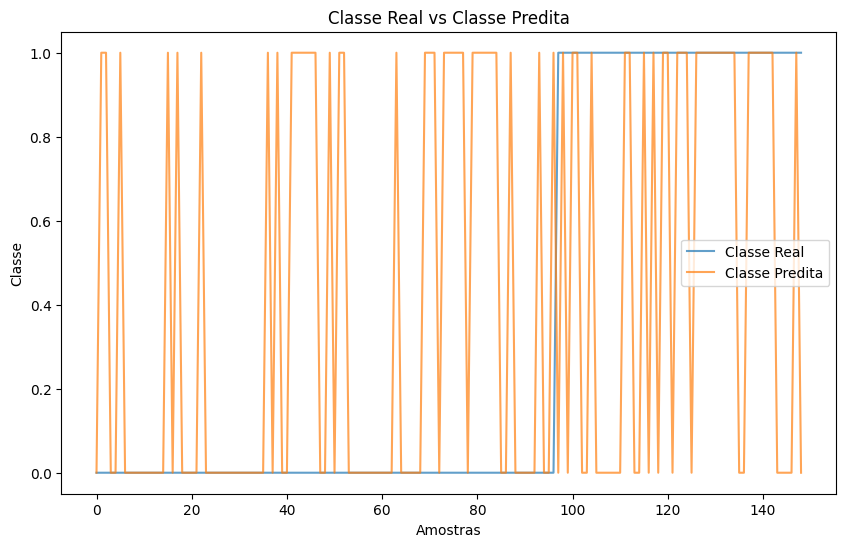

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

parent_dir = '/content/drive/MyDrive/coral_images'
img_width, img_height = 128, 128
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 25

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    parent_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    parent_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


validation_loss, validation_accuracy = model.evaluate(validation_generator)
print("Validation Accuracy:", validation_accuracy)


y_pred = model.predict(validation_generator)
y_true = validation_generator.classes


def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Perda de Treinamento')
    plt.plot(history.history['val_loss'], label='Perda de Validação')
    plt.title('Perda de Treinamento e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
    plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
    plt.title('Acurácia de Treinamento e Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

def classify_predictions(predictions):
    return [1 if pred >= 0.5 else 0 for pred in predictions]

def plot_real_vs_predicted(y_true, y_pred):
    y_pred_class = classify_predictions(y_pred)

    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='Classe Real', alpha=0.7)
    plt.plot(y_pred_class, label='Classe Predita', alpha=0.7)
    plt.title('Classe Real vs Classe Predita')
    plt.xlabel('Amostras')
    plt.ylabel('Classe')
    plt.legend()
    plt.show()

plot_history(history)

plot_real_vs_predicted(y_true, y_pred)

1/1 [==============================] - 0s 93ms/step


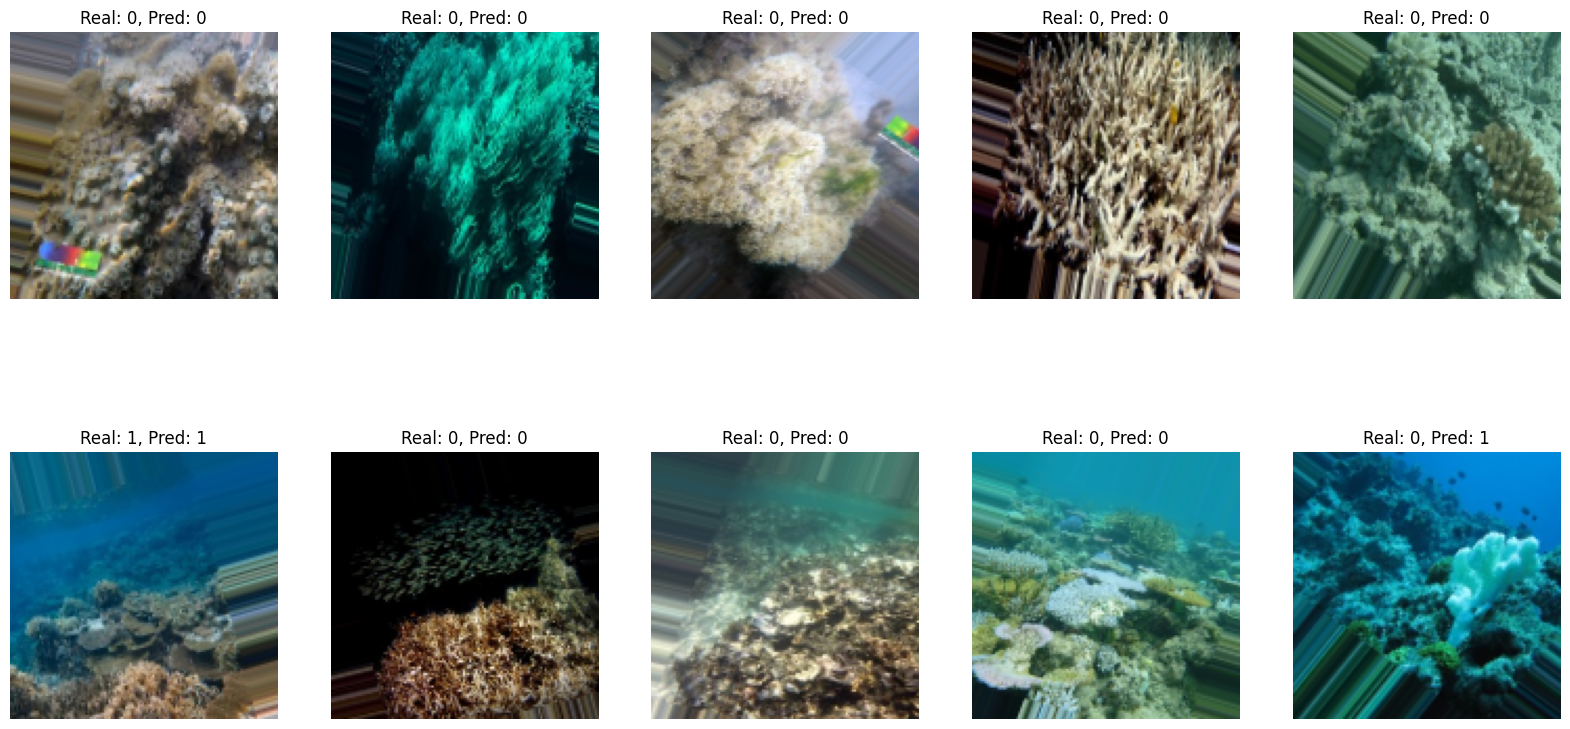

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(generator, model, num_images=10):
    x_val, y_val = next(generator)
    y_pred = model.predict(x_val)

    plt.figure(figsize=(20, 10))

    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(x_val[i])


        class_pred = 1 if y_pred[i][0] >= 0.5 else 0


        class_real = 1 if y_val[i] >= 0.5 else 0


        plt.title(f"Real: {class_real}, Pred: {class_pred}")
        plt.axis('off')

    plt.show()


plot_predictions(validation_generator, model, num_images=10)
